In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
print(trainFeature.shape, devFeature.shape, evalFeature.shape)

(5060, 1120) (731, 1120) (909, 1120)


In [4]:
# Universial Hyper-parameters
batchSize = 150

### Relu non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.05699 s
Reach the maximum iteration	 452.19 s
At 274 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.536363636364
Development Accuracy:	 0.40902872777
Evaluation Accuracy:	 0.355335533553


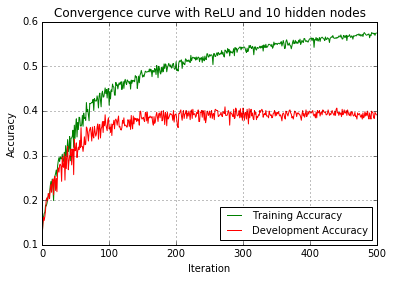

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.12164 s
Reach the maximum iteration	 548.24 s
At 431 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.526482213439
Development Accuracy:	 0.396716826265
Evaluation Accuracy:	 0.392739273927


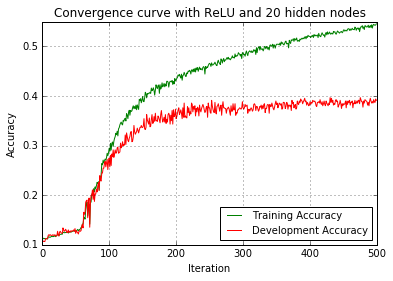

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04761 s
Reach the maximum iteration	 593.49 s
At 476 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.595652173913
Development Accuracy:	 0.400820793434
Evaluation Accuracy:	 0.376237623762


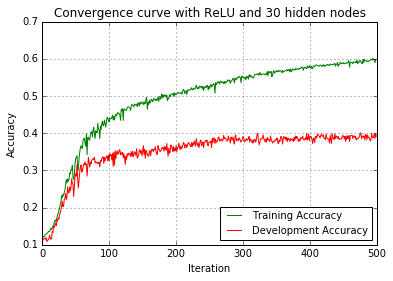

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.06066 s
Reach the maximum iteration	 523.64 s
At 451 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.678063241107
Development Accuracy:	 0.414500683995
Evaluation Accuracy:	 0.388338833883


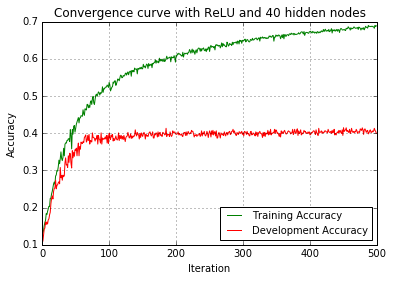

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.04144 s
Reach the maximum iteration	 401.39 s
At 429 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.521343873518
Development Accuracy:	 0.372093023256
Evaluation Accuracy:	 0.348734873487


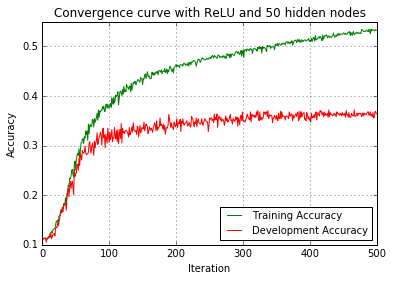

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.1, 0.1, 0.09, 0.08, 0.06]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='relu', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with ReLU and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Sigmoid non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.08479 s
Reach the maximum iteration	 906.6 s
At 335 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.569960474308
Development Accuracy:	 0.417236662107
Evaluation Accuracy:	 0.366336633663


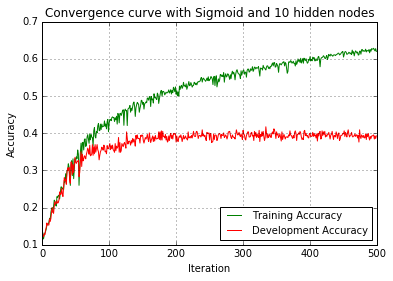

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.03243 s
Reach the maximum iteration	 943.94 s
At 368 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.774901185771
Development Accuracy:	 0.463748290014
Evaluation Accuracy:	 0.392739273927


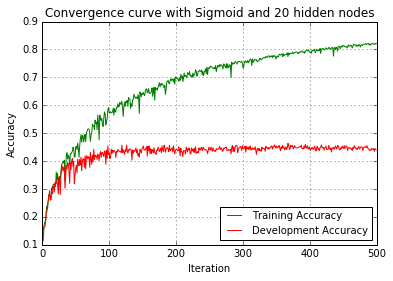

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.10089 s
Reach the maximum iteration	 1034.37 s
At 246 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.763043478261
Development Accuracy:	 0.452804377565
Evaluation Accuracy:	 0.426842684268


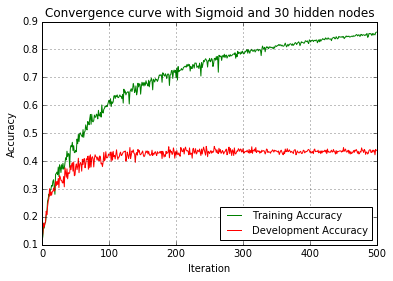

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.05071 s
Reach the maximum iteration	 1088.16 s
At 115 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.692292490119
Development Accuracy:	 0.46511627907
Evaluation Accuracy:	 0.420242024202


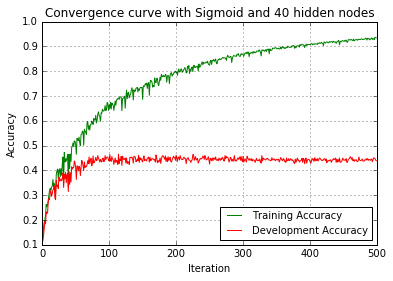

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.03923 s
Reach the maximum iteration	 1124.06 s
At 155 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.777272727273
Development Accuracy:	 0.495212038304
Evaluation Accuracy:	 0.438943894389


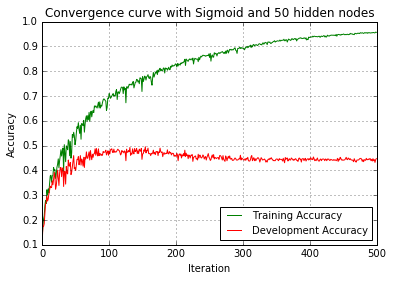

In [6]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='sigmoid', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Sigmoid and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Tanh non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.06059 s
Reach the maximum iteration	 284.46 s
At 243 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.559090909091
Development Accuracy:	 0.403556771546
Evaluation Accuracy:	 0.379537953795


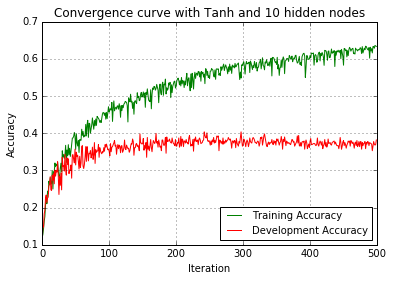

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0175 s
Reach the maximum iteration	 308.75 s
At 189 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.660671936759
Development Accuracy:	 0.461012311902
Evaluation Accuracy:	 0.410341034103


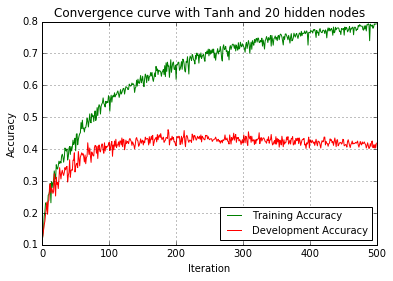

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.02509 s
Reach the maximum iteration	 350.78 s
At 164 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.750988142292
Development Accuracy:	 0.466484268126
Evaluation Accuracy:	 0.404840484048


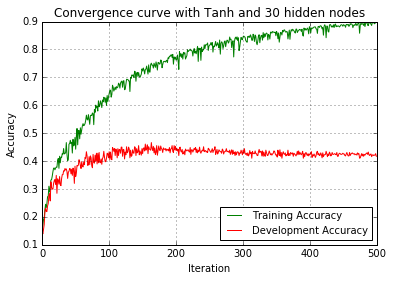

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.01964 s
Reach the maximum iteration	 366.11 s
At 124 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.735375494071
Development Accuracy:	 0.458276333789
Evaluation Accuracy:	 0.409240924092


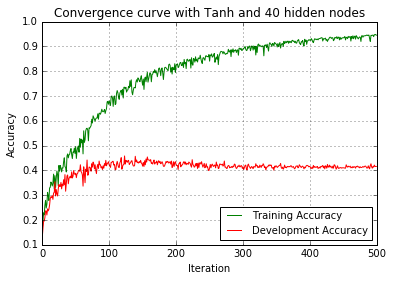

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.01869 s
Reach the maximum iteration	 368.43 s
At 133 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.791106719368
Development Accuracy:	 0.447332421341
Evaluation Accuracy:	 0.430143014301


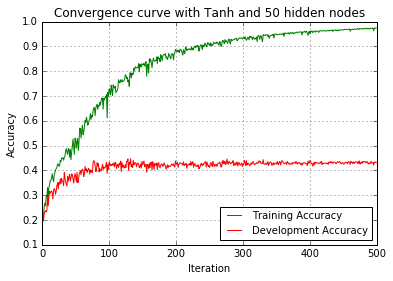

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)

    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='tanh', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Tanh and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()